In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from datetime import datetime 

from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import StandardScaler

data = pd.read_excel('Тестовое_задание_ДКД_МО_ДЗМ_Аналитик_2.xlsx', sheet_name='Sheet1')
data.head()

,ID заболевания,Дата начала заболевания,Дата выздоровления,ID пациента,ДР,Пол,Тяжесть,Медицинская организация
0,141783700,2022-11-01,2022-11-14,121430796,2017-05-13,муж,Без симптомов,Поликлиника №2
1,141683060,2022-11-01,2022-11-14,65946638,1981-03-01,муж,Легкая степень тяжести,Поликлиника №1
2,141763920,2022-11-01,2022-11-14,110127394,2002-08-03,жен,Легкая степень тяжести,Поликлиника №4
3,141689580,2022-11-01,2022-11-14,96273380,2001-10-19,жен,Легкая степень тяжести,Поликлиника №5
4,141476780,2022-11-01,2022-11-08,124251147,1956-01-13,жен,Легкая степень тяжести,Поликлиника №5


### Задание 1

In [29]:
a = len(data["ID пациента"].unique())
b = len(data.groupby("ID пациента"))
print(a==b, a)

True 6495


### Задание 2

In [30]:
a = len(data["ID заболевания"].unique())
b = len(data.groupby("ID заболевания"))
print(a==b, a)

True 6500


### Задание 3

C:\Users\ilyas\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


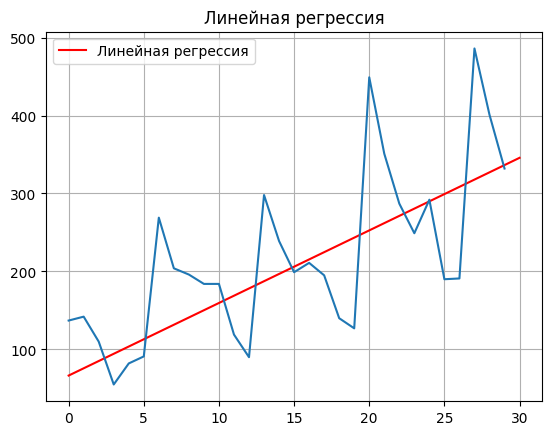

In [31]:
a = data.groupby("Дата начала заболевания")["ID пациента"].count()
a = a.reset_index()

# Замена значений в столбце на подряд идущие числа
a['Дата начала заболевания'] = range(1, len(a) + 1)

y = a['ID пациента']
a = a.drop(['ID пациента'], axis=1)
x_train, x_test, y_train, y_test = train_test_split(a, y, test_size=0.2)

lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

X_pred = np.linspace(0, 30, 10).reshape(-1, 1)  
y_pred = lin_reg.predict(X_pred)
plt.plot(X_pred, y_pred, color='red', label='Линейная регрессия')  

a = (data.groupby("Дата начала заболевания")["ID пациента"].count()).to_list()
b = list(range(len(a)))
plt.plot(b, a)

c = np.linspace(0, 30, 1000).reshape(-1, 1)
plt.title('Линейная регрессия')
plt.legend()
plt.grid()

plt.show()

В день прибавляется примерно по 8 пациентов. Также заметна периодичность, примерно каждые 7 дней наблюдается пик. 

### Задание 4

In [32]:
data["Возраст"] = (datetime.now() - data["ДР"]).dt.days // 365

In [33]:
def f(n):
    if n < 18:
        return 0
    elif n < 65:
        return 1
    else:
        return 2


data["Индикатор категории"] = data["Возраст"].apply(f)

In [34]:
data.groupby(["Индикатор категории","Тяжесть","Пол"])["ID пациента"].count()
#как видно, наибольшее число больных в категории взрослых людей. переносят болезнь легко. При этом видно, что мужчины болеют больше женщин.

Индикатор категории  Тяжесть                  Пол
0                    Без симптомов            жен    296
                                              муж    429
                     Легкая степень тяжести   жен    208
                                              муж    287
                     Средняя степень тяжести  жен    513
                                              муж    684
                     Тяжелая степень тяжести  жен     28
                                              муж     42
1                    Без симптомов            жен    322
                                              муж    477
                     Легкая степень тяжести   жен    610
                                              муж    916
                     Средняя степень тяжести  жен    229
                                              муж    339
                     Тяжелая степень тяжести  жен     13
                                              муж     25
2                    Без симптомов    

В категории взрослых людей больше всего больных, что не удивительно. Более интересен тот факт, что взрослые чаще болеют или без симптомов или в легкой форме, в отличие от двух других категорий. Также виден половой перекос: заболевших мужчин больше, чем женщин.

### Задание 5

In [35]:
count_people = pd.read_excel('Тестовое_задание_ДКД_МО_ДЗМ_Аналитик_2.xlsx', sheet_name='Справочно')

In [36]:
z = data.groupby("Медицинская организация")["ID пациента"].count()
z = z.reset_index()
z.rename(columns={'ID пациента': 'количество пациентов'}, inplace=True)
num5 = pd.merge(z,count_people,on = 'Медицинская организация', how = 'inner')
num5['Процент'] = num5['количество пациентов'] * 100 / num5['Прикреплённое население']
num5 = num5.sort_values(by = 'Процент', ascending=False)
num5 = num5.drop(['Прикреплённое население'], axis=1)
num5

,Медицинская организация,количество пациентов,Процент
0,Поликлиника №1,1405,20.071429
4,Поликлиника №5,1439,13.081818
3,Поликлиника №4,1165,12.944444
1,Поликлиника №2,1230,7.235294
2,Поликлиника №3,1261,5.731818


### Задание 6

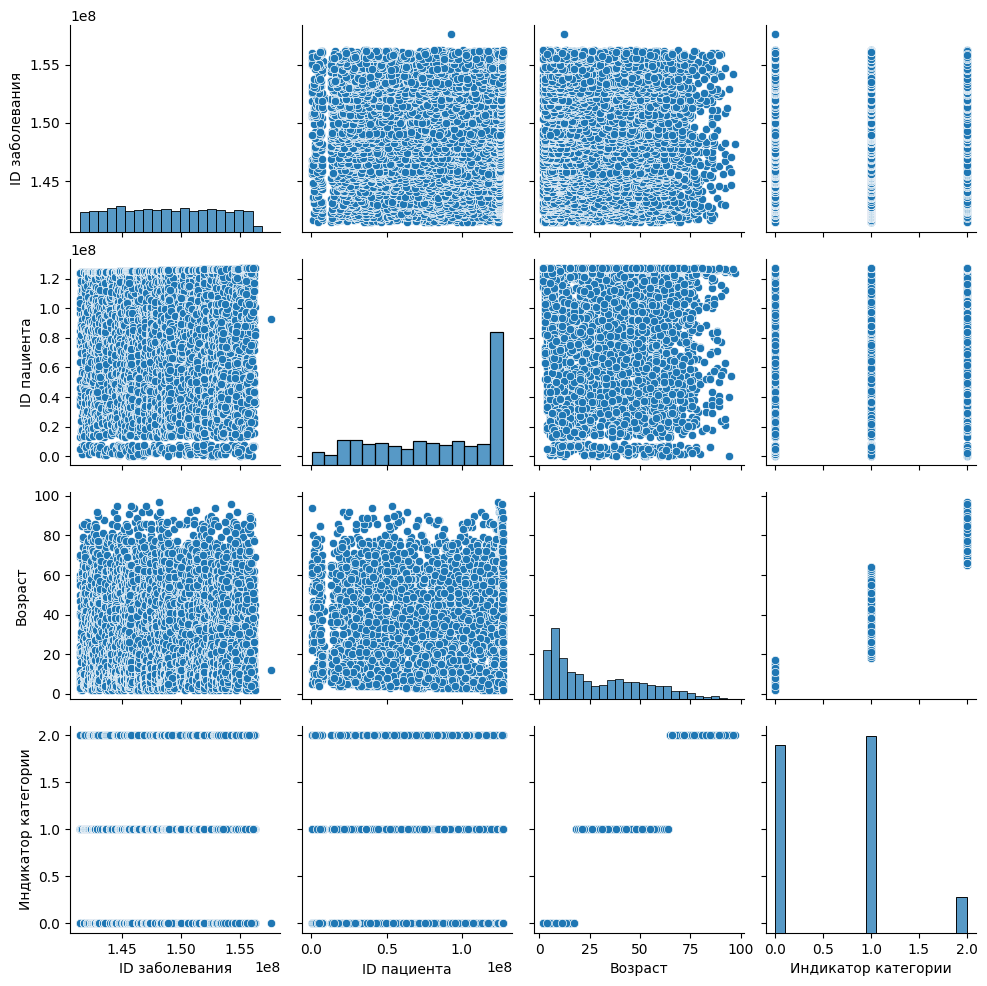

In [37]:
sns.pairplot(data)

In [38]:
data["Время болезни"] = data["Дата выздоровления"] -data["Дата начала заболевания"]
df = data[data["Время болезни"] < pd.Timedelta(days=1)]
df

,ID заболевания,Дата начала заболевания,Дата выздоровления,ID пациента,ДР,Пол,Тяжесть,Медицинская организация,Возраст,Индикатор категории,Время болезни
320,142380840,2022-11-03,2022-11-03,58366542,2011-07-15,жен,NaN,Поликлиника №2,13,0,0 days
365,142261000,2022-11-03,2022-11-03,16442570,2011-08-08,муж,NaN,Поликлиника №2,13,0,0 days
492,142705120,2022-11-05,2022-11-05,124512250,1986-05-05,муж,Легкая степень тяжести,Поликлиника №2,38,1,0 days
1141,144180160,2022-11-09,2022-11-09,56105729,2005-06-01,жен,NaN,Поликлиника №4,19,1,0 days
1573,144833000,2022-11-11,2022-11-11,124045430,2020-10-01,жен,Без симптомов,Поликлиника №2,4,0,0 days
2087,146230180,2022-11-14,2022-11-14,33248685,2017-01-01,жен,Без симптомов,Поликлиника №3,8,0,0 days
2383,146625100,2022-11-15,2022-11-15,114223408,2022-05-23,муж,Без симптомов,Поликлиника №3,2,0,0 days
2746,147750860,2022-11-17,2022-11-17,69251693,2016-03-29,жен,NaN,Поликлиника №5,8,0,0 days
3550,149655600,2022-11-21,2022-11-21,125892123,1947-04-12,жен,NaN,Поликлиника №1,77,2,0 days
3785,150225140,2022-11-22,2022-11-22,50747108,2008-09-06,жен,Без симптомов,Поликлиника №3,16,0,0 days


Аномалиями можно счесть пациентами с нулевым временем болезни. Возможно этому есть разумное объяснение.

### Задание 7

In [39]:
data["Время болезни"].mean()
def f(n):
    if n < 11:
        return 0
    elif n < 20:
        return 1
    elif n < 36:
        return 2
    elif n < 45:
        return 3
    elif n < 60:
        return 4
    elif n < 75:
        return 5
    else:
        return 6
data["Индикатор категории"] = data["Возраст"].apply(f)

In [40]:
df = data.groupby("Индикатор категории")["Время болезни"].mean()
df

Индикатор категории
0   13 days 01:10:27.906976744
1   12 days 14:38:57.662337662
2   10 days 20:24:48.721804511
3   10 days 17:09:48.305847076
4   11 days 05:28:04.848484848
5   11 days 00:14:43.134582623
6   11 days 05:31:19.646017699
Name: Время болезни, dtype: timedelta64[ns]

Как видно, время болезни немного зависит от возраста. Дети болеют дольше взрослых, при этом старшее поколение болеет дольше (или же остается в больнице дольше по иным причинам)

In [41]:
df = data.groupby("Тяжесть", dropna=False)["Время болезни"].mean()
df

Тяжесть
Без симптомов             11 days 21:38:47.360774818
Легкая степень тяжести    10 days 19:28:25.433318365
Средняя степень тяжести   12 days 22:12:07.757824525
Тяжелая степень тяжести             14 days 12:24:00
NaN                       11 days 22:07:49.565217391
Name: Время болезни, dtype: timedelta64[ns]

Очевидно, степень тяжести тоже влияет на то, как долго пациент будет находиться в больнице

In [42]:
df = data.groupby("Медицинская организация", dropna=False)["Время болезни"].mean()
df

Медицинская организация
Поликлиника №1   11 days 13:31:43.772241992
Поликлиника №2   12 days 00:09:21.951219512
Поликлиника №3   11 days 21:53:14.607454401
Поликлиника №4   11 days 17:55:21.888412017
Поликлиника №5   12 days 04:24:11.007644197
Name: Время болезни, dtype: timedelta64[ns]

Номер поликлиники не влияет на выздоровление

## Попробуем обучить пару ml-моделей, чтобы понять, какие признаки больше всего влияют на скорость выздоровления

In [43]:
data['Мужчина'] = data['Пол'].apply(lambda x: 1 if x == 'муж' else 0)
df_encoded = pd.get_dummies(data, columns=['Тяжесть','Медицинская организация'])
df_encoded = df_encoded.drop(['Пол','ID заболевания','Дата начала заболевания',	'Дата выздоровления','ID пациента','ДР'], axis=1)
df_encoded['Время болезни'] = df_encoded['Время болезни'].dt.days
df_encoded= df_encoded.dropna()
df_copy = df_encoded.copy()
df_copy2 = df_encoded
df_encoded['Время болезни'] = df_encoded['Время болезни'].apply(lambda x: x//5)
ttt= StandardScaler().fit(df_encoded).transform(df_encoded)
df_encoded.head()

,Возраст,Индикатор категории,Время болезни,Мужчина,Тяжесть_Без симптомов,Тяжесть_Легкая степень тяжести,Тяжесть_Средняя степень тяжести,Тяжесть_Тяжелая степень тяжести,Медицинская организация_Поликлиника №1,Медицинская организация_Поликлиника №2,Медицинская организация_Поликлиника №3,Медицинская организация_Поликлиника №4,Медицинская организация_Поликлиника №5
0,7,0,2,1,True,False,False,False,False,True,False,False,False
1,43,3,2,1,False,True,False,False,True,False,False,False,False
2,22,2,2,0,False,True,False,False,False,False,False,True,False
3,23,2,2,0,False,True,False,False,False,False,False,False,True
4,69,5,1,0,False,True,False,False,False,False,False,False,True


In [44]:
y = df_encoded["Время болезни"]
df_encoded = df_encoded.drop(["Время болезни"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(ttt, y, test_size=0.2) #сюда можно подать нестандартизированный датафрейм df_encoded

In [47]:
from sklearn.metrics import mean_squared_error, r2_score
model = DecisionTreeClassifier(max_depth = 5)
model.fit(X_train, y_train)

# 5. Предсказание на тестовой выборке
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(f'R^2 Score: {r2:.2f}')

Accuracy: 0.98
R^2 Score: 0.97


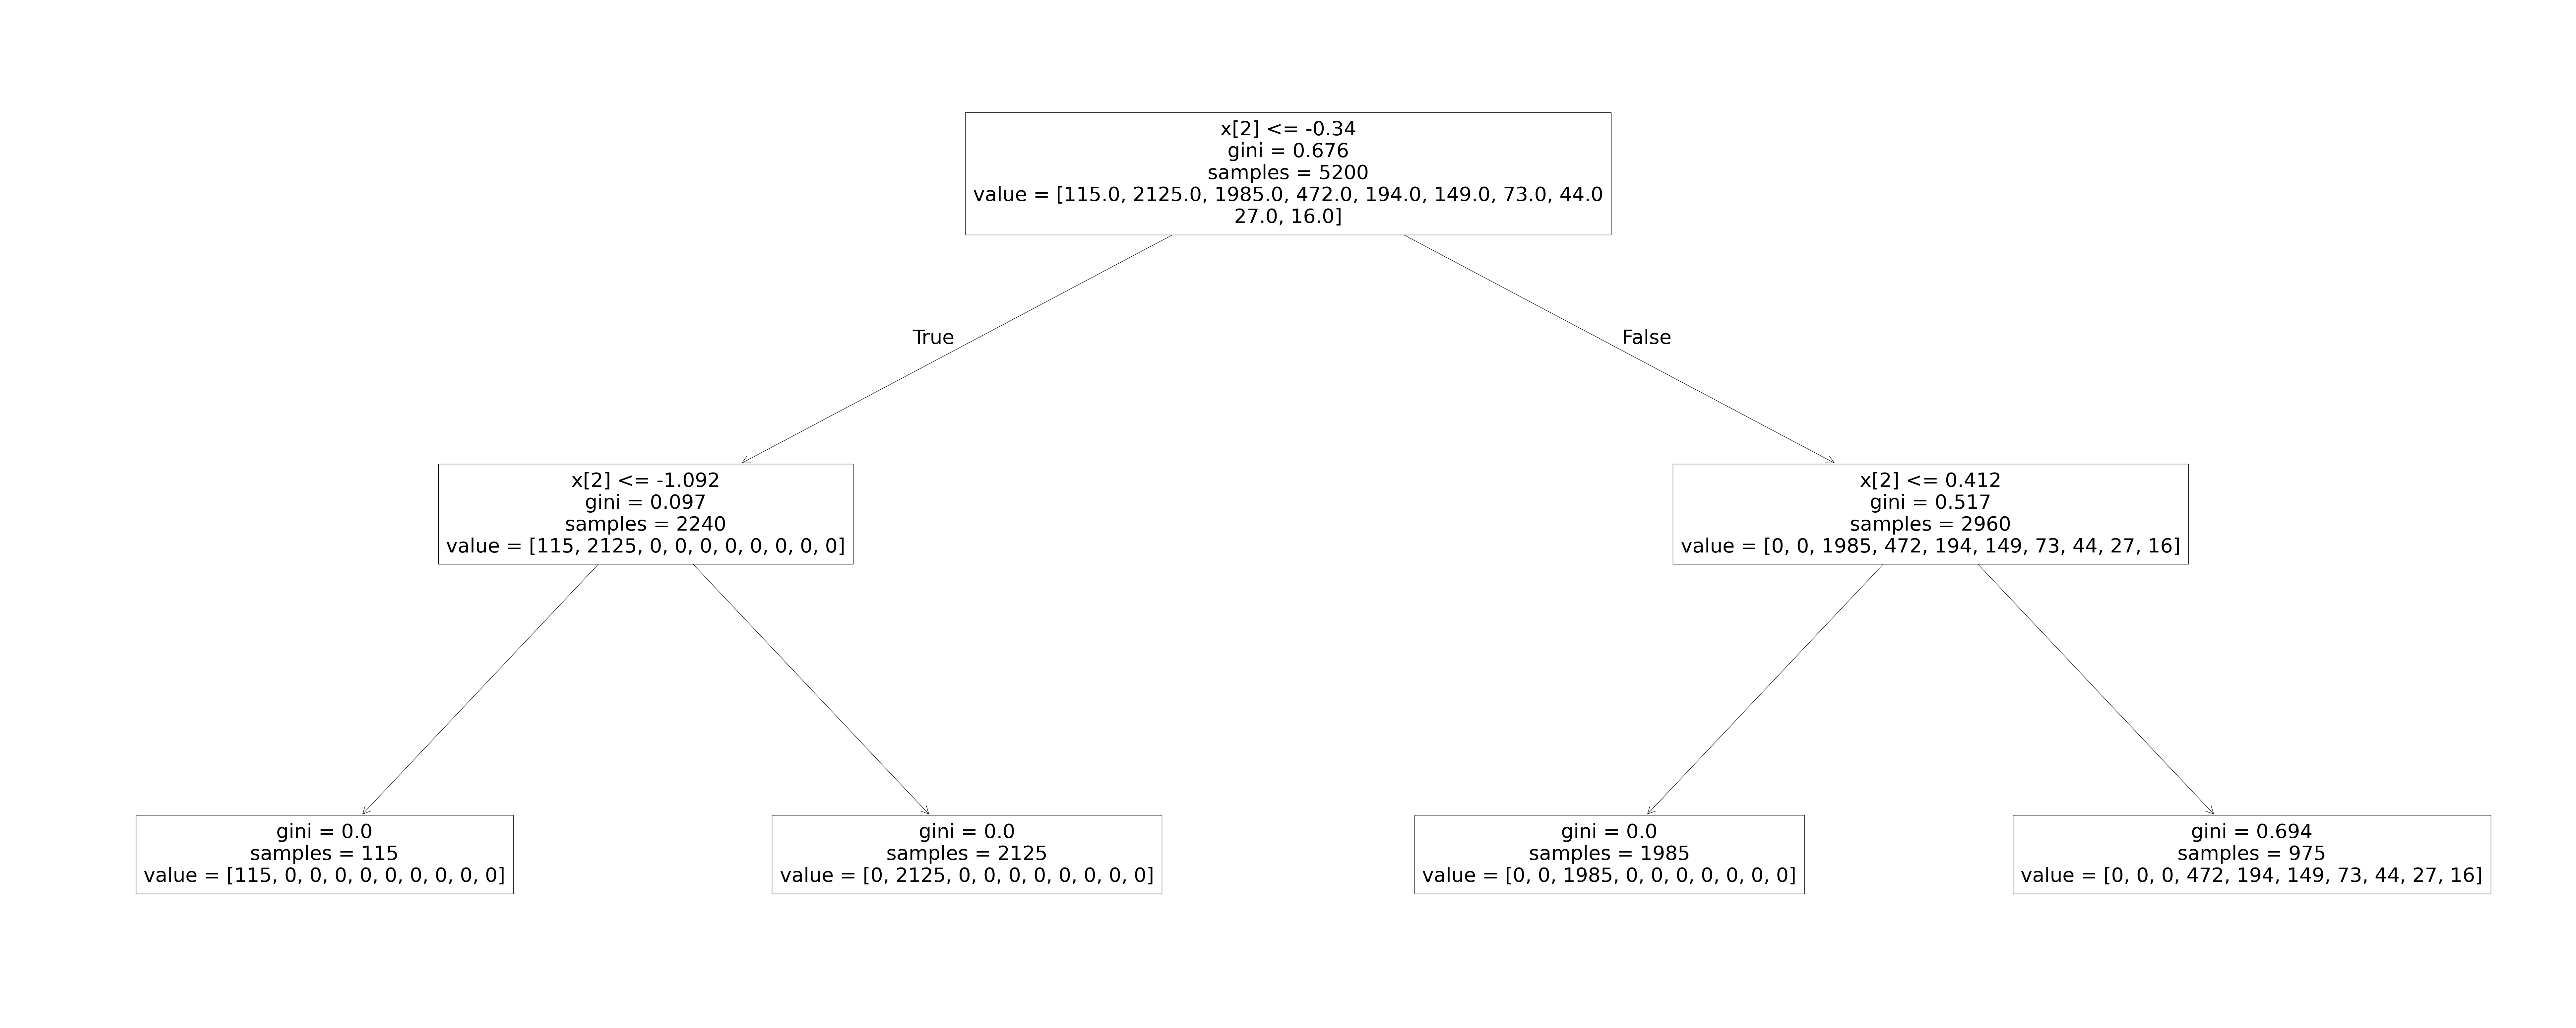

In [21]:
plt.figure(figsize=(100, 40))
a=plot_tree(model)

Модель считает наиболее важными признаками пол и степень тяжести заболевания. Достаточно ожидаемо. 
Хорошо ли работает модель? 
На стандартизированных данных она выдает больше 95 процентов. Если рассмотреть распределение времени, проведенного в поликлинике, то станет видно, что основная масса вылечивается за 10-20 дней. В нашем случае это категория 1 и 2. 

Таких людей порядка 65% во всей выборке, следовательно, говоря случайному человеку, что он вылечится за 10 дней, мы угадаем в 33% случаев, аналогично и с прогнозом от 10 до 20 дней. 




Модель же в 95% случаев угадывает, сколько дней понадобится пациенту, чтобы вылечиться. 

<Axes: xlabel='Время болезни', ylabel='Density'>

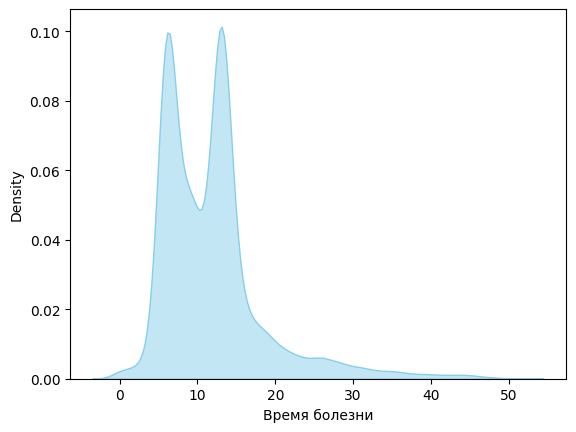

In [48]:
sns.kdeplot(df_copy['Время болезни'], fill=True, color='skyblue', alpha=0.5)

(array([ 145., 2644., 2483.,  604.,  245.,  178.,   89.,   56.,   37.,
          19.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

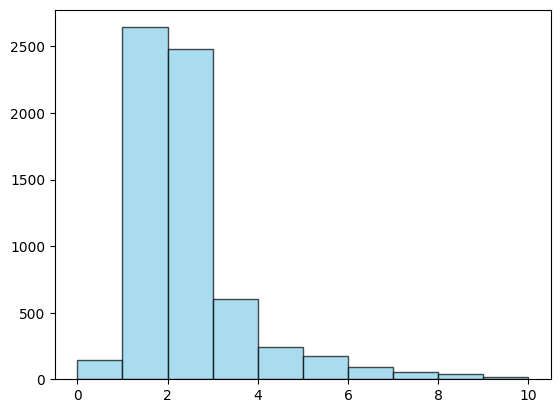

In [49]:
plt.hist(df_copy2['Время болезни'], bins=10, color='skyblue', edgecolor='black', alpha=0.7)

In [50]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(df_encoded, y, test_size=0.2)
scaler = StandardScaler()
# Создание модели k-NN с k=5
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

model = KNeighborsRegressor(n_neighbors=10)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_test = np.array(y_test, dtype=float)
y_pred = np.array(y_pred, dtype=float)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')

Mean Squared Error: 1.89
R^2 Score: -0.04


Метод k ближайших соседей не оправдал ожиданий. Он стабильно ошибается на 1 категорию, а в нашем случае это целых 5 дней. Метрика R^2 также говорит о его неэффективности: он ничем не лучше простого среднего арифметического от выборки. 

Вероятно, это можно объяснить тем, что далекие друг от друга объекты - подросток и человек преклонного возраста - проводят в больнице примерно одинаковый срок. К тому же, вероятно, здесь не соблюдается гипотеза компактности: похожие друг на друга объекты могут требовать разное время для лечения, а KNN усредняет время между k ближайшими объектами, отсюда и выходит сходство со средним по всей выборке. 